# NOTE: MODIFY THE PATHS BEFORE RUNNING 

## needed packages 

In [2]:
import numpy as np
import pandas as pd

print(np.__version__)

import pickle 

import os

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# 2D ploting imports 
import plotly
# 3-D plot using surface graph
import plotly.graph_objs as go
import numpy as np
import plotly.io as pio
from scipy.interpolate import griddata


from tqdm import tqdm

# ignore warnings
import warnings
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

from tqdm import tqdm

# ignore warnings
import warnings

warnings.filterwarnings("ignore")

1.24.2


## 3D ploting fuctions for both surface and contour plots

In [3]:
# 3D plot
def plot_3d(x, y, z, title='3D Plot', x_label='X', y_label='Y', z_label='Z', save_fig=False, transparent=False, width=800, height=800, algorithm='algorithm', contour = False):
    """This function plots the 3D graph of the data using plotly
        in contour plot the z axis is represented by colors """

    # Convert input lists to numpy arrays and flatten them
    X = np.array(x)
    Y = np.array(y)
    Z = np.array(z)

    if contour:


        # Create grid values first
        grid_x, grid_y = np.mgrid[min(X):max(X):80j, min(Y):max(Y):80j]
        # grid_x, grid_y = np.meshgrid(np.linspace(np.min(X), np.max(X), 50), np.linspace(np.min(Y), np.max(Y), 50))
        # Interpolate using cubic interpolation
        
        grid_z = griddata((X, Y), Z, (grid_x, grid_y), method='linear')

        # contour plot using matplotlib not plotly

        plt.contourf(grid_x, grid_y, grid_z, levels=29, cmap='viridis')
        plt.colorbar()
        # hide the title of the graph
        # plt.title('Contour Plot with Cubic Interpolation')

        # naming axis
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()
        # save the contour plot 
        plt.savefig(f'{algorithm}_contourV1.png')

        if save_fig:
            if transparent:
                transparency = 'transparent'

                # save the figure in png extension with name of the algorithm and transparency
                plt.savefig(f'{algorithm}_transContourV1_{transparency}.png', transparent=True)

            else:
                transparency = 'non-transparent'

                # save the figure in png extension with name of the algorithm and transparency
                plt.savefig(f'{algorithm}nontransContourV1.png')  
        return
        
    # Create grid values first
    grid_x, grid_y = np.meshgrid(np.linspace(np.min(X), np.max(X), 50), np.linspace(np.min(Y), np.max(Y), 50))
    
    # Interpolate the z values on the grid using 'linear' method
    grid_z = griddata((X, Y), Z, (grid_x, grid_y), method='linear')

    # Create the 3D surface plot
    surface = go.Surface(x=grid_x, y=grid_y, z=grid_z, colorscale='Viridis')

    layout = go.Layout(
                title=title,
                scene=dict(
                    xaxis_title=x_label,
                    yaxis_title=y_label,
                    zaxis_title=z_label),
                width=width,
                height=height
                ) 
    fig = go.Figure(data=[surface], layout=layout)
    fig.show()

    if save_fig:
        if transparent:
            transparency = 'transparent'
            layout_trans = go.Layout(
                title=title,
                scene=dict(
                    xaxis_title=x_label,
                    yaxis_title=y_label,
                    zaxis_title=z_label),
                paper_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot
                plot_bgcolor='rgba(0,0,0,0)',   # Transparent background for the plot
                width=width,
                height=height
                ) 
            fig = go.Figure(data=[surface], layout=layout_trans)
            # save the figure in png extension with name of the algorithm and transparency
            pio.write_image(fig, f'{algorithm}_trans3d.png')


        else:
            transparency = 'non-transparent'

            # save the figure in png extension with name of the algorithm and transparency
            pio.write_image(fig, f'{algorithm}nontrans_3d.png')
            

## Results reading and transformation

In [5]:
import pickle
# convert pkl file to csv file 
def pkl_to_csv(pkl_file, csv_file):
    # read the pkl file
    with open(pkl_file, 'rb') as f:
        data = pickle.load(f)
    # convert the pkl file to csv file
    data.to_csv(csv_file, index=False)

# convert csv file to pkl file
pkl_to_csv('/Users/user/Desktop/Software Engineer/Fundamentals/ml-assisted-binary-search1/hybrid_vfinal.pkl', '/Users/user/Desktop/Software Engineer/Fundamentals/ml-assisted-binary-search1/hybrid_vfinal3.csv')

In [6]:
# convert the csv file to dataframe

import pandas as pd 
# read the csv file
df = pd.read_csv('/Users/user/Desktop/Software Engineer/Fundamentals/ml-assisted-binary-search1/hybrid_vfinal3.csv')

# convert the dataframe columns to n-lists without creating fucntion and take care of coloumn names in the read datafram 
# binary_runs = df['binary_runs'].values.tolist()
# hybrid_runs = df['hybrid_runs'].values.tolist()
alpha = df['alpha'].values.tolist()
saved_runs = df['saved_runs'].values.tolist()
loss = df['loss'].values.tolist()

In [7]:
# number of -ve values in saved runs list 
print(f"Number of negative values in saved runs: {len([i for i in saved_runs if i < 0])}")


Number of negative values in saved runs: 15


In [8]:
# check all lists have the same length
len(alpha), len(saved_runs), len(loss)

(840, 840, 840)

In [9]:
# multiplay all values in the listy by 2
new_saved_runs = []
for ele in saved_runs:
    ele = ele*100
    new_saved_runs.append(ele)

print(np.max(new_saved_runs))

68.08731137337796


# Plots generation

In [10]:
# ploting surface plot

# change contour to True to plot the contour plot
plot_3d(loss, alpha, new_saved_runs, title='3D Plot', x_label='wBCE loss', y_label='alpha values',z_label='Saved runs %',
                                                                        save_fig=True, transparent=True,
                                                                        width=1000, height=1000,
                                                                        algorithm='hybrid', contour = False)

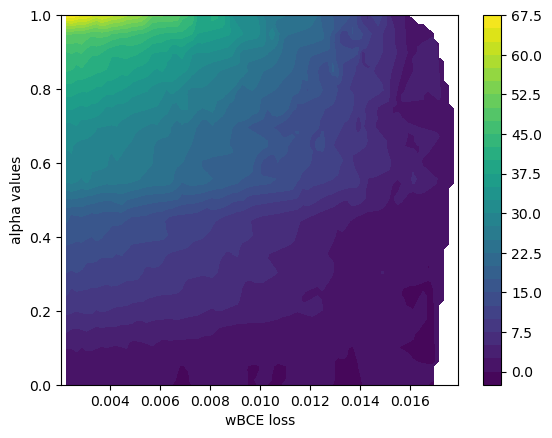

<Figure size 640x480 with 0 Axes>

In [11]:
# ploting contour plot

# change contour to True to plot the contour plot
plot_3d(loss, alpha, new_saved_runs, title='3D Plot', x_label='wBCE loss', y_label='alpha values',z_label='Saved runs %',
                                                                        save_fig=True, transparent=True,
                                                                        width=1000, height=1000,
                                                                        algorithm='hybrid', contour = True)

In [12]:
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=loss,
    y=new_saved_runs,
    z=alpha,
    mode='markers',
    marker=dict(
        size=5,
        color=loss,                # set color to an array/list of desired values
        colorscale='Viridis',      # choose a colorscale
        opacity=0.8
    )
)])

# Update layout
fig.update_layout(
    title='3D Plot of Alpha, Saved Runs, and Loss',
    scene=dict(
        xaxis_title='loss',
        yaxis_title='saved_runs',
        zaxis_title='alpha'
    ),
    width=1001,
    height=1001
)

# Show the plot
fig.show()